In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from functools import partial, reduce
from numpy.linalg import inv
from scipy.stats import lognorm
import pylab

%matplotlib inline

# Least squares

Задаем преобразование признаков

In [2]:
def polynom(i, x):
    return x**i

Генерируем матрицу объекты-признаки

In [3]:
degree = 5
def make_poly_features(fun, X, i=degree):
    features = [fun(i, X) for i in range(i)]
    features = np.array(features).T
    return features

Получаем веса

In [4]:
#features = make_poly_features(polynom, X)
def get_weights(features, y):
    return inv(features.T@features)@features.T@y

Генерируем признаки

In [5]:
# s = 0.54
# mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

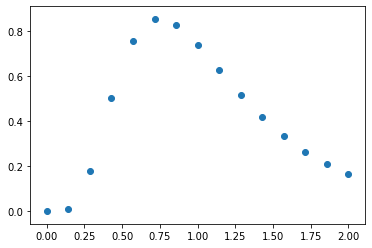

In [6]:
s = 0.54
X = np.linspace(0, 2, 15)
Y = lognorm.pdf(X, s)
plt.scatter(X, Y)

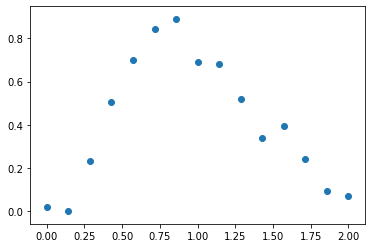

In [7]:
Y_new =[]
for i, val in enumerate(Y):
    Y_new.append(val + np.random.normal(scale = 0.07))
plt.scatter(X, Y_new)

In [8]:
def fitted_func(W, x, degree=degree):
    _sum = 0
    for i in range(degree):
        _sum += W[i]*(pow(x, i))
    return _sum

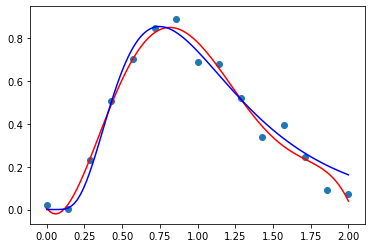

In [9]:
degree=6
X_test = np.linspace(0, 2, 100)
W = get_weights(make_poly_features(polynom, X, degree), Y_new)
pylab.scatter(X, Y_new)
pylab.plot(X_test, fitted_func(W, X_test, degree), c='red')
pylab.plot(X_test, lognorm.pdf(X_test, s), c='blue')
pylab.show()

# Overfitting

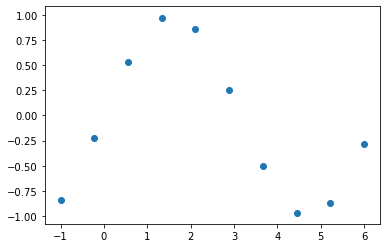

In [10]:
X_of = np.linspace(-1, 6, 10)
Y_of = np.sin(X_of)
plt.scatter(X_of, Y_of)

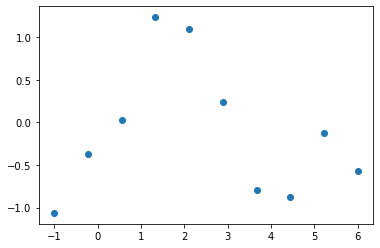

In [11]:
Y_new_of =[]
for i, val in enumerate(Y_of):
    Y_new_of.append(val + np.random.normal(scale = 0.3))
plt.scatter(X_of, Y_new_of)

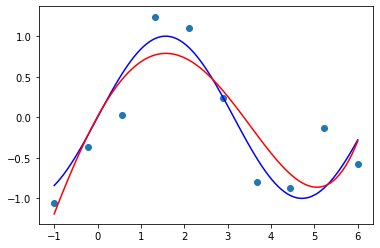

In [16]:
degree = 5
X_test_of = np.linspace(-1, 6, 100)
W_of = get_weights(make_poly_features(polynom, X_of, degree), Y_new_of)
pylab.scatter(X_of, Y_new_of)
pylab.plot(X_test_of, np.sin(X_test_of), c='blue')
pylab.plot(X_test_of, fitted_func(W_of, X_test_of, degree), c='red')
pylab.show()

# Cross validation

60


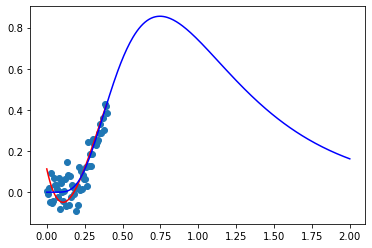

0.7565587932442017


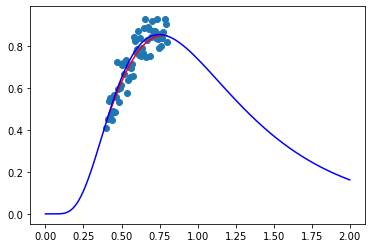

0.8379586138898966


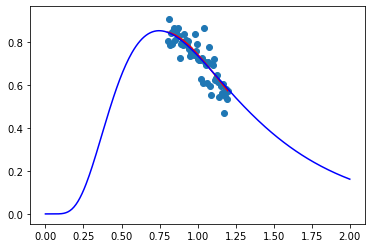

0.757566047239237


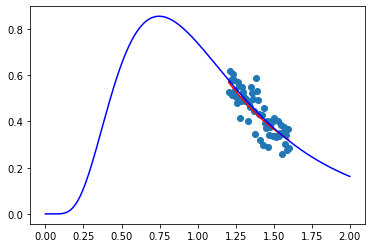

0.6898772012760774


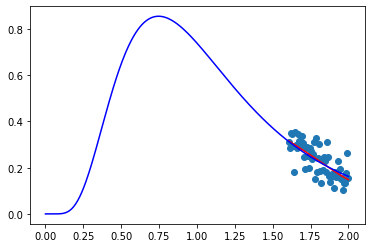

0.5514151156114722
Ans  0.7186751542521769


In [17]:
from sklearn.metrics import r2_score
s = 0.54
am_of_sample = 300
X = np.linspace(0, 2, am_of_sample)
Y = lognorm.pdf(X, s)

Y_new =[]
for i, val in enumerate(Y):
    Y_new.append(val + np.random.normal(scale = 0.05))

avg = 0
degree = 7

am_of_s = int(am_of_sample/5)
print(am_of_s)
for i in range(0, 5):
    X_test, X_train = X[am_of_s*i: (i+1)*am_of_s], np.array(list(X[:am_of_s*i]) + list(X[i*(am_of_s+1):]))
    Y_test, Y_train = Y_new[am_of_s*i: (i+1)*am_of_s], np.array(list(Y_new[:am_of_s*i]) + list(Y_new[i*(am_of_s+1):]))
    W = get_weights(make_poly_features(polynom, X_train, degree), Y_train)
    
    pylab.scatter(X_test, Y_test)
    pylab.plot(X_test, fitted_func(W, X_test, degree), c='red')
    pylab.plot(X_train, lognorm.pdf(X_train, s), c='blue')
    pylab.show()
    
    print(r2_score(Y_test, fitted_func(W, X_test, degree)))
    avg += r2_score(Y_test, fitted_func(W, X_test, degree))
print("Ans ", avg/5)